In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',200)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
# load data set
train = pd.read_csv("HousePrices/train.csv")
test  = pd.read_csv("HousePrices/test.csv")

# step 1 - EDA

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.drop(["Id"],axis=1,inplace=True)

In [6]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [8]:
for features in train.columns:
    if train[features].isnull().sum()>0:
        print(features)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [9]:
nullcols = [features for features in train.columns if train[features].isnull().sum()>0]

In [10]:
train.shape

(1460, 80)

In [11]:
trainnullper=train.apply(lambda x:np.round(100*x.isnull().sum()/train.shape[0],2))
trainnullcount=train.isnull().sum()

In [12]:
pd.DataFrame([trainnullcount,trainnullper])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0,0.0,259.00,0.0,0.0,1369.00,0.0,0.0,0.0,0.0,...,0.0,1453.00,1179.00,1406.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,17.74,0.0,0.0,93.77,0.0,0.0,0.0,0.0,...,0.0,99.52,80.75,96.3,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
trainnullDF=pd.DataFrame([trainnullcount,trainnullper]).T

In [14]:
trainnullDF

,0,1
MSSubClass,0.0,0.00
MSZoning,0.0,0.00
LotFrontage,259.0,17.74
LotArea,0.0,0.00
Street,0.0,0.00
Alley,1369.0,93.77
LotShape,0.0,0.00
LandContour,0.0,0.00
Utilities,0.0,0.00
LotConfig,0.0,0.00


In [15]:
trainnullDF.columns=["NullValues","NullPercentage"]
trainnullDF

,NullValues,NullPercentage
MSSubClass,0.0,0.00
MSZoning,0.0,0.00
LotFrontage,259.0,17.74
LotArea,0.0,0.00
Street,0.0,0.00
Alley,1369.0,93.77
LotShape,0.0,0.00
LandContour,0.0,0.00
Utilities,0.0,0.00
LotConfig,0.0,0.00


In [16]:
trainnullDF.sort_values(by="NullValues",ascending=False,inplace=True)
trainnullDF

,NullValues,NullPercentage
PoolQC,1453.0,99.52
MiscFeature,1406.0,96.30
Alley,1369.0,93.77
Fence,1179.0,80.75
FireplaceQu,690.0,47.26
LotFrontage,259.0,17.74
GarageYrBlt,81.0,5.55
GarageCond,81.0,5.55
GarageType,81.0,5.55
GarageFinish,81.0,5.55


In [17]:
trainnullDF.reset_index(inplace=True)
trainnullDF

,index,NullValues,NullPercentage
0,PoolQC,1453.0,99.52
1,MiscFeature,1406.0,96.30
2,Alley,1369.0,93.77
3,Fence,1179.0,80.75
4,FireplaceQu,690.0,47.26
5,LotFrontage,259.0,17.74
6,GarageYrBlt,81.0,5.55
7,GarageCond,81.0,5.55
8,GarageType,81.0,5.55
9,GarageFinish,81.0,5.55


In [18]:
# drpping columns more than 40% of null values
train.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1,inplace=True)

In [19]:
trainnullper=train.apply(lambda x:np.round(100*x.isnull().sum()/train.shape[0],2))
trainnullcount=train.isnull().sum()
trainnullDF=pd.DataFrame([trainnullcount,trainnullper]).T
trainnullDF.columns=["NullValues","NullPercentage"]
trainnullDF.sort_values(by="NullValues",ascending=False,inplace=True)
trainnullDF.reset_index(inplace=True)
trainnullDF.head(10)

,index,NullValues,NullPercentage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [20]:
trainnullDF.head(20)

,index,NullValues,NullPercentage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


# step 2- Handling Missing Values

In [21]:
trainnullDF[:14]["index"]

0      LotFrontage
1       GarageType
2      GarageYrBlt
3     GarageFinish
4       GarageQual
5       GarageCond
6     BsmtFinType2
7     BsmtExposure
8         BsmtQual
9         BsmtCond
10    BsmtFinType1
11      MasVnrArea
12      MasVnrType
13      Electrical
Name: index, dtype: object

In [22]:
nullcolumns = np.array(trainnullDF[:14]["index"])
nullcolumns

array(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [23]:
for column in nullcolumns:
    if train[column].dtype=="object":
        print(column)
        train[column].fillna(train[column].mode()[0],inplace=True)
    else:
        print(f"{column} this is numerical")
        train[column].fillna(train[column].median(),inplace=True)    

LotFrontage this is numerical
GarageType
GarageYrBlt this is numerical
GarageFinish
GarageQual
GarageCond
BsmtFinType2
BsmtExposure
BsmtQual
BsmtCond
BsmtFinType1
MasVnrArea this is numerical
MasVnrType
Electrical


In [24]:
trainnullper=train.apply(lambda x:np.round(100*x.isnull().sum()/train.shape[0],2))
trainnullcount=train.isnull().sum()
trainnullDF=pd.DataFrame([trainnullcount,trainnullper]).T
trainnullDF.columns=["NullValues","NullPercentage"]
trainnullDF.sort_values(by="NullValues",ascending=False,inplace=True)
trainnullDF.reset_index(inplace=True)
trainnullDF.head(10)

,index,NullValues,NullPercentage
0,MSSubClass,0.0,0.0
1,GarageYrBlt,0.0,0.0
2,Fireplaces,0.0,0.0
3,Functional,0.0,0.0
4,TotRmsAbvGrd,0.0,0.0
5,KitchenQual,0.0,0.0
6,KitchenAbvGr,0.0,0.0
7,BedroomAbvGr,0.0,0.0
8,HalfBath,0.0,0.0
9,FullBath,0.0,0.0


In [25]:
# at the end total no of int,float,obj are seen
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [26]:
# to know numerical features(34+3=37,int+float)selecting their column names
numericalcolumns=train.select_dtypes(include=np.number).columns
numericalcolumns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [27]:
# to know object features(38=object)selecting their column names
objectcolumns=train.select_dtypes(include=np.object).columns
objectcolumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

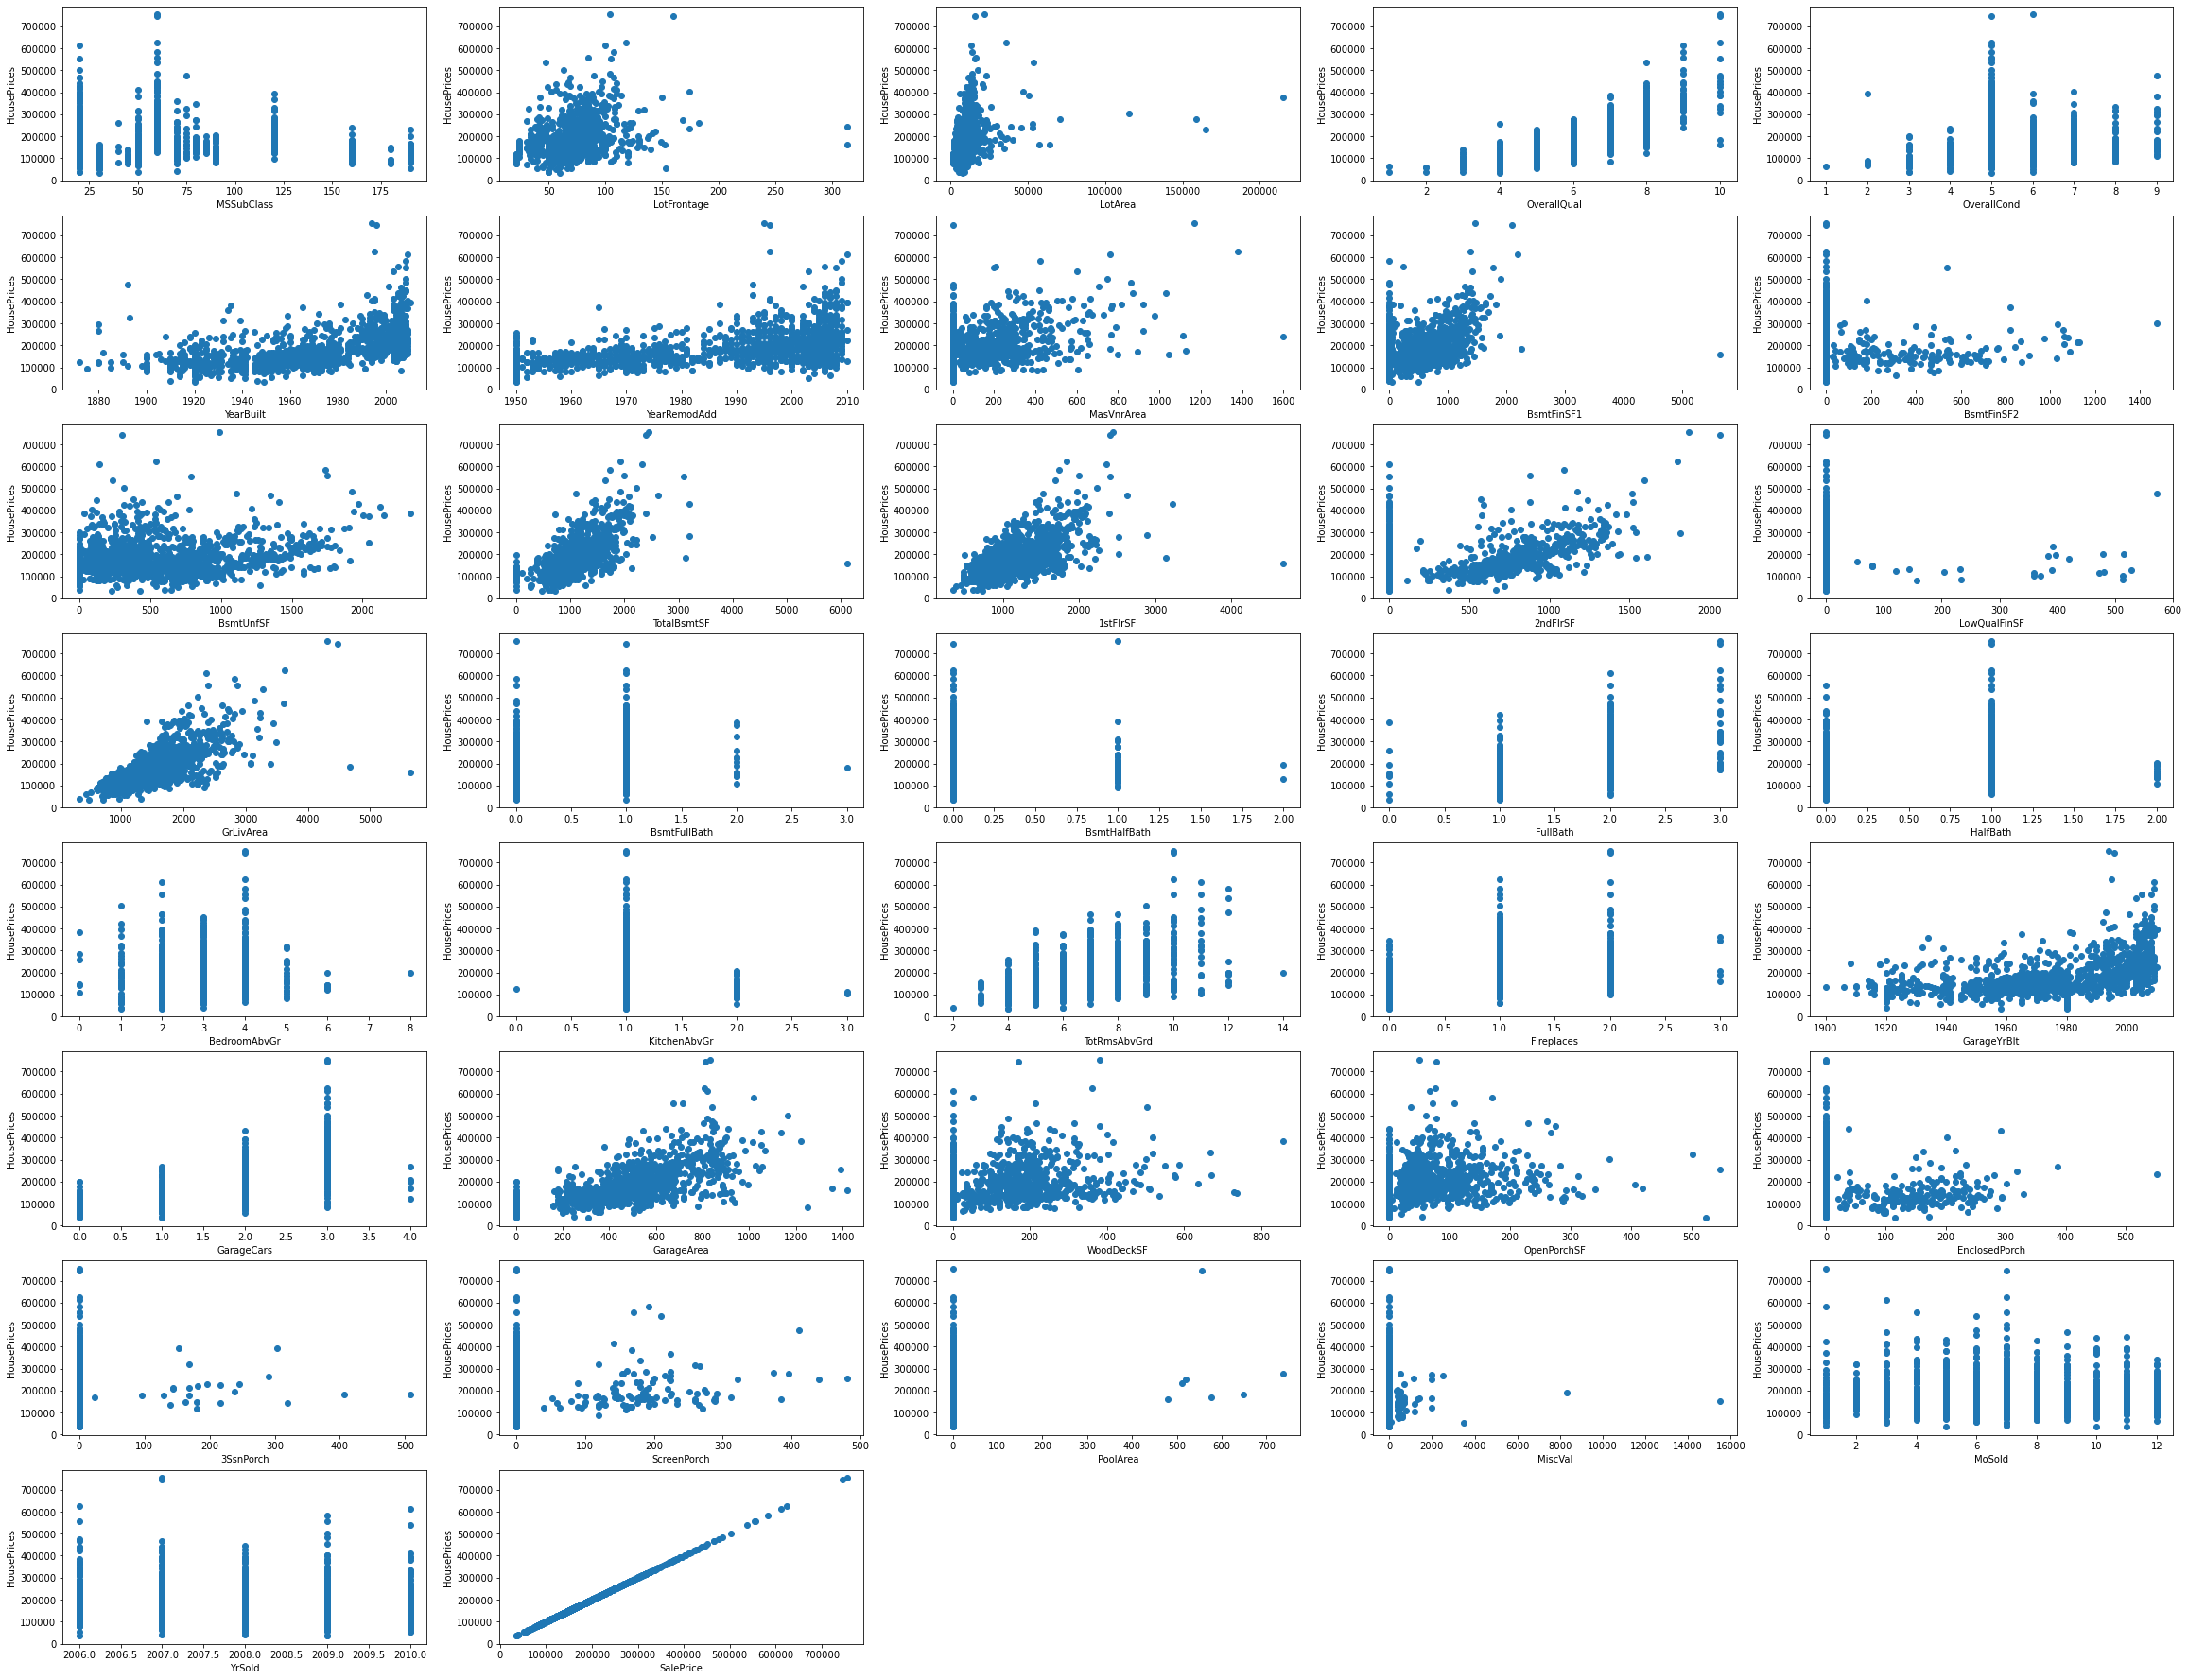

In [28]:
j=0
plt.figure(figsize=(40,40))
for column in numericalcolumns:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train["SalePrice"])
    plt.xlabel(column)
    plt.ylabel('HousePrices')
    j+=1

In [29]:
train["MSSubClass"].nunique()

15

In [30]:
train['LotFrontage'].nunique()

110

In [31]:
# from this separating discrete and continuous
descriatecols=[]
continuouscols=[]

for column in numericalcolumns:
    if train[column].nunique()>20:
        continuouscols.append(column)
    else:
        descriatecols.append(column)    

In [32]:
continuouscols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [33]:
descriatecols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

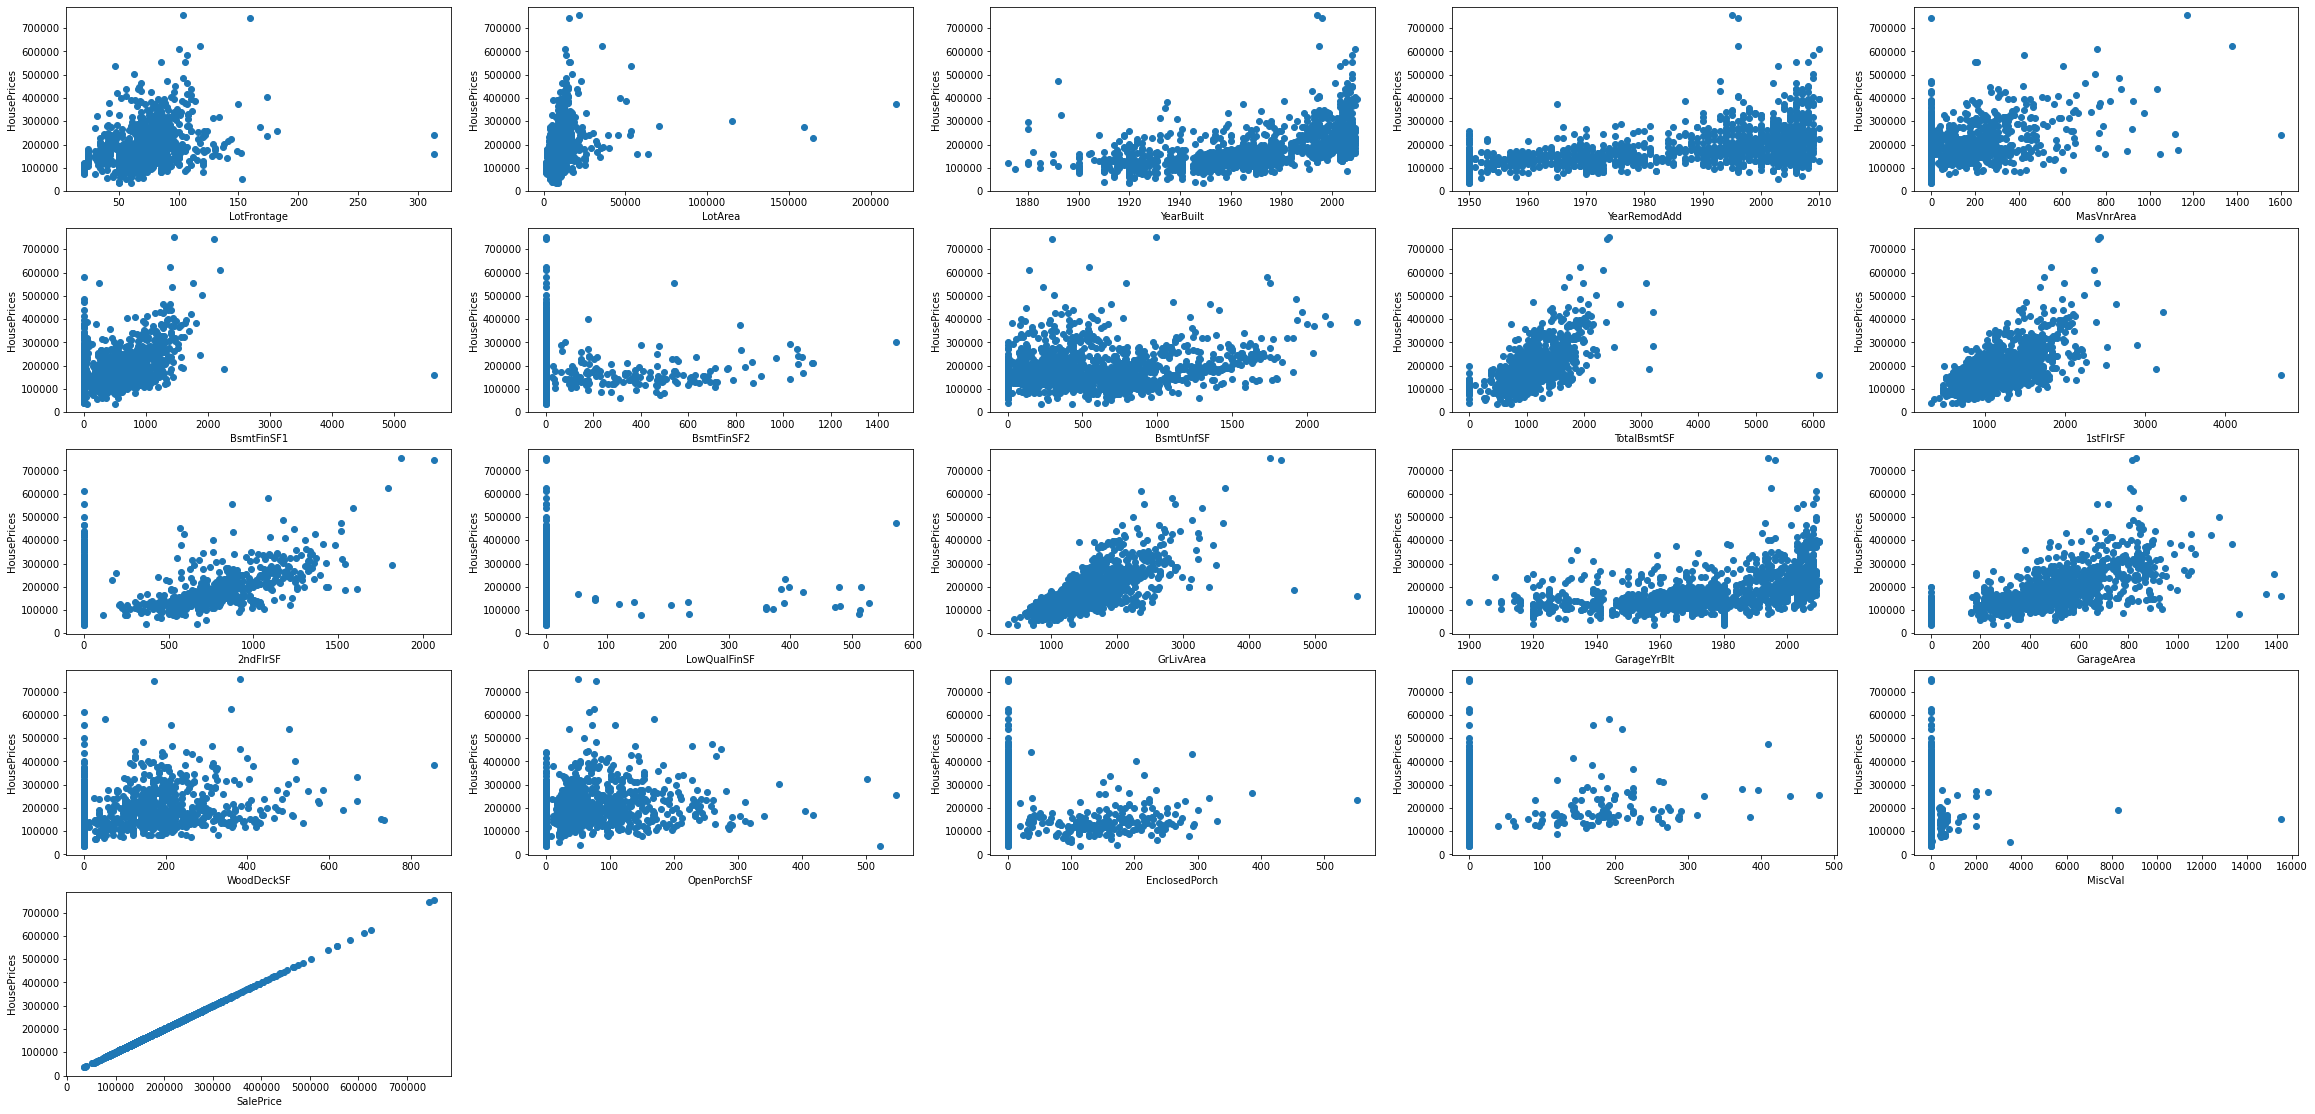

In [34]:
j=0
plt.figure(figsize=(40,40))
for column in continuouscols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train["SalePrice"])
    plt.xlabel(column)
    plt.ylabel('HousePrices')
    j+=1

In [35]:
descriatecols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

In [36]:
# this is mean of sales price for each value in mssubclass, for mssubclass=20 mean of salesprice=185224(wherever 20 comes for mssubclass mean of cooresponding saleprice is taken)
observationval=train.groupby('MSSubClass')["SalePrice"].mean()
observationval
# convert into DF for easy ploting
observationvalDF=pd.DataFrame(observationval).sort_values(by='SalePrice',ascending=False)
observationvalDF.reset_index(inplace=True)

In [37]:
observationvalDF

,MSSubClass,SalePrice
0,60,239948.501672
1,120,200779.080460
2,75,192437.500000
3,20,185224.811567
4,80,169736.551724
5,70,166772.416667
6,40,156125.000000
7,85,147810.000000
8,50,143302.972222
9,160,138647.380952


<BarContainer object of 15 artists>

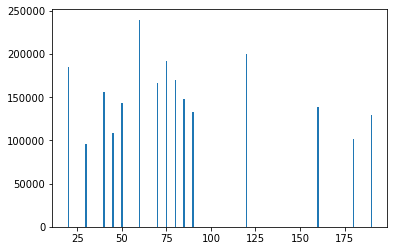

In [38]:
plt.bar(observationvalDF['MSSubClass'],observationvalDF['SalePrice'])

<BarContainer object of 10 artists>

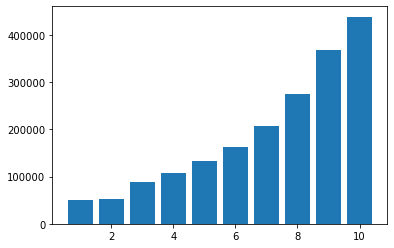

In [39]:
observationval=train.groupby('OverallQual')["SalePrice"].mean()
observationvalDF=pd.DataFrame(observationval).sort_values(by='SalePrice',ascending=False)
observationvalDF.reset_index(inplace=True)
plt.bar(observationvalDF['OverallQual'],observationvalDF['SalePrice'])

In [40]:
len(descriatecols)

16

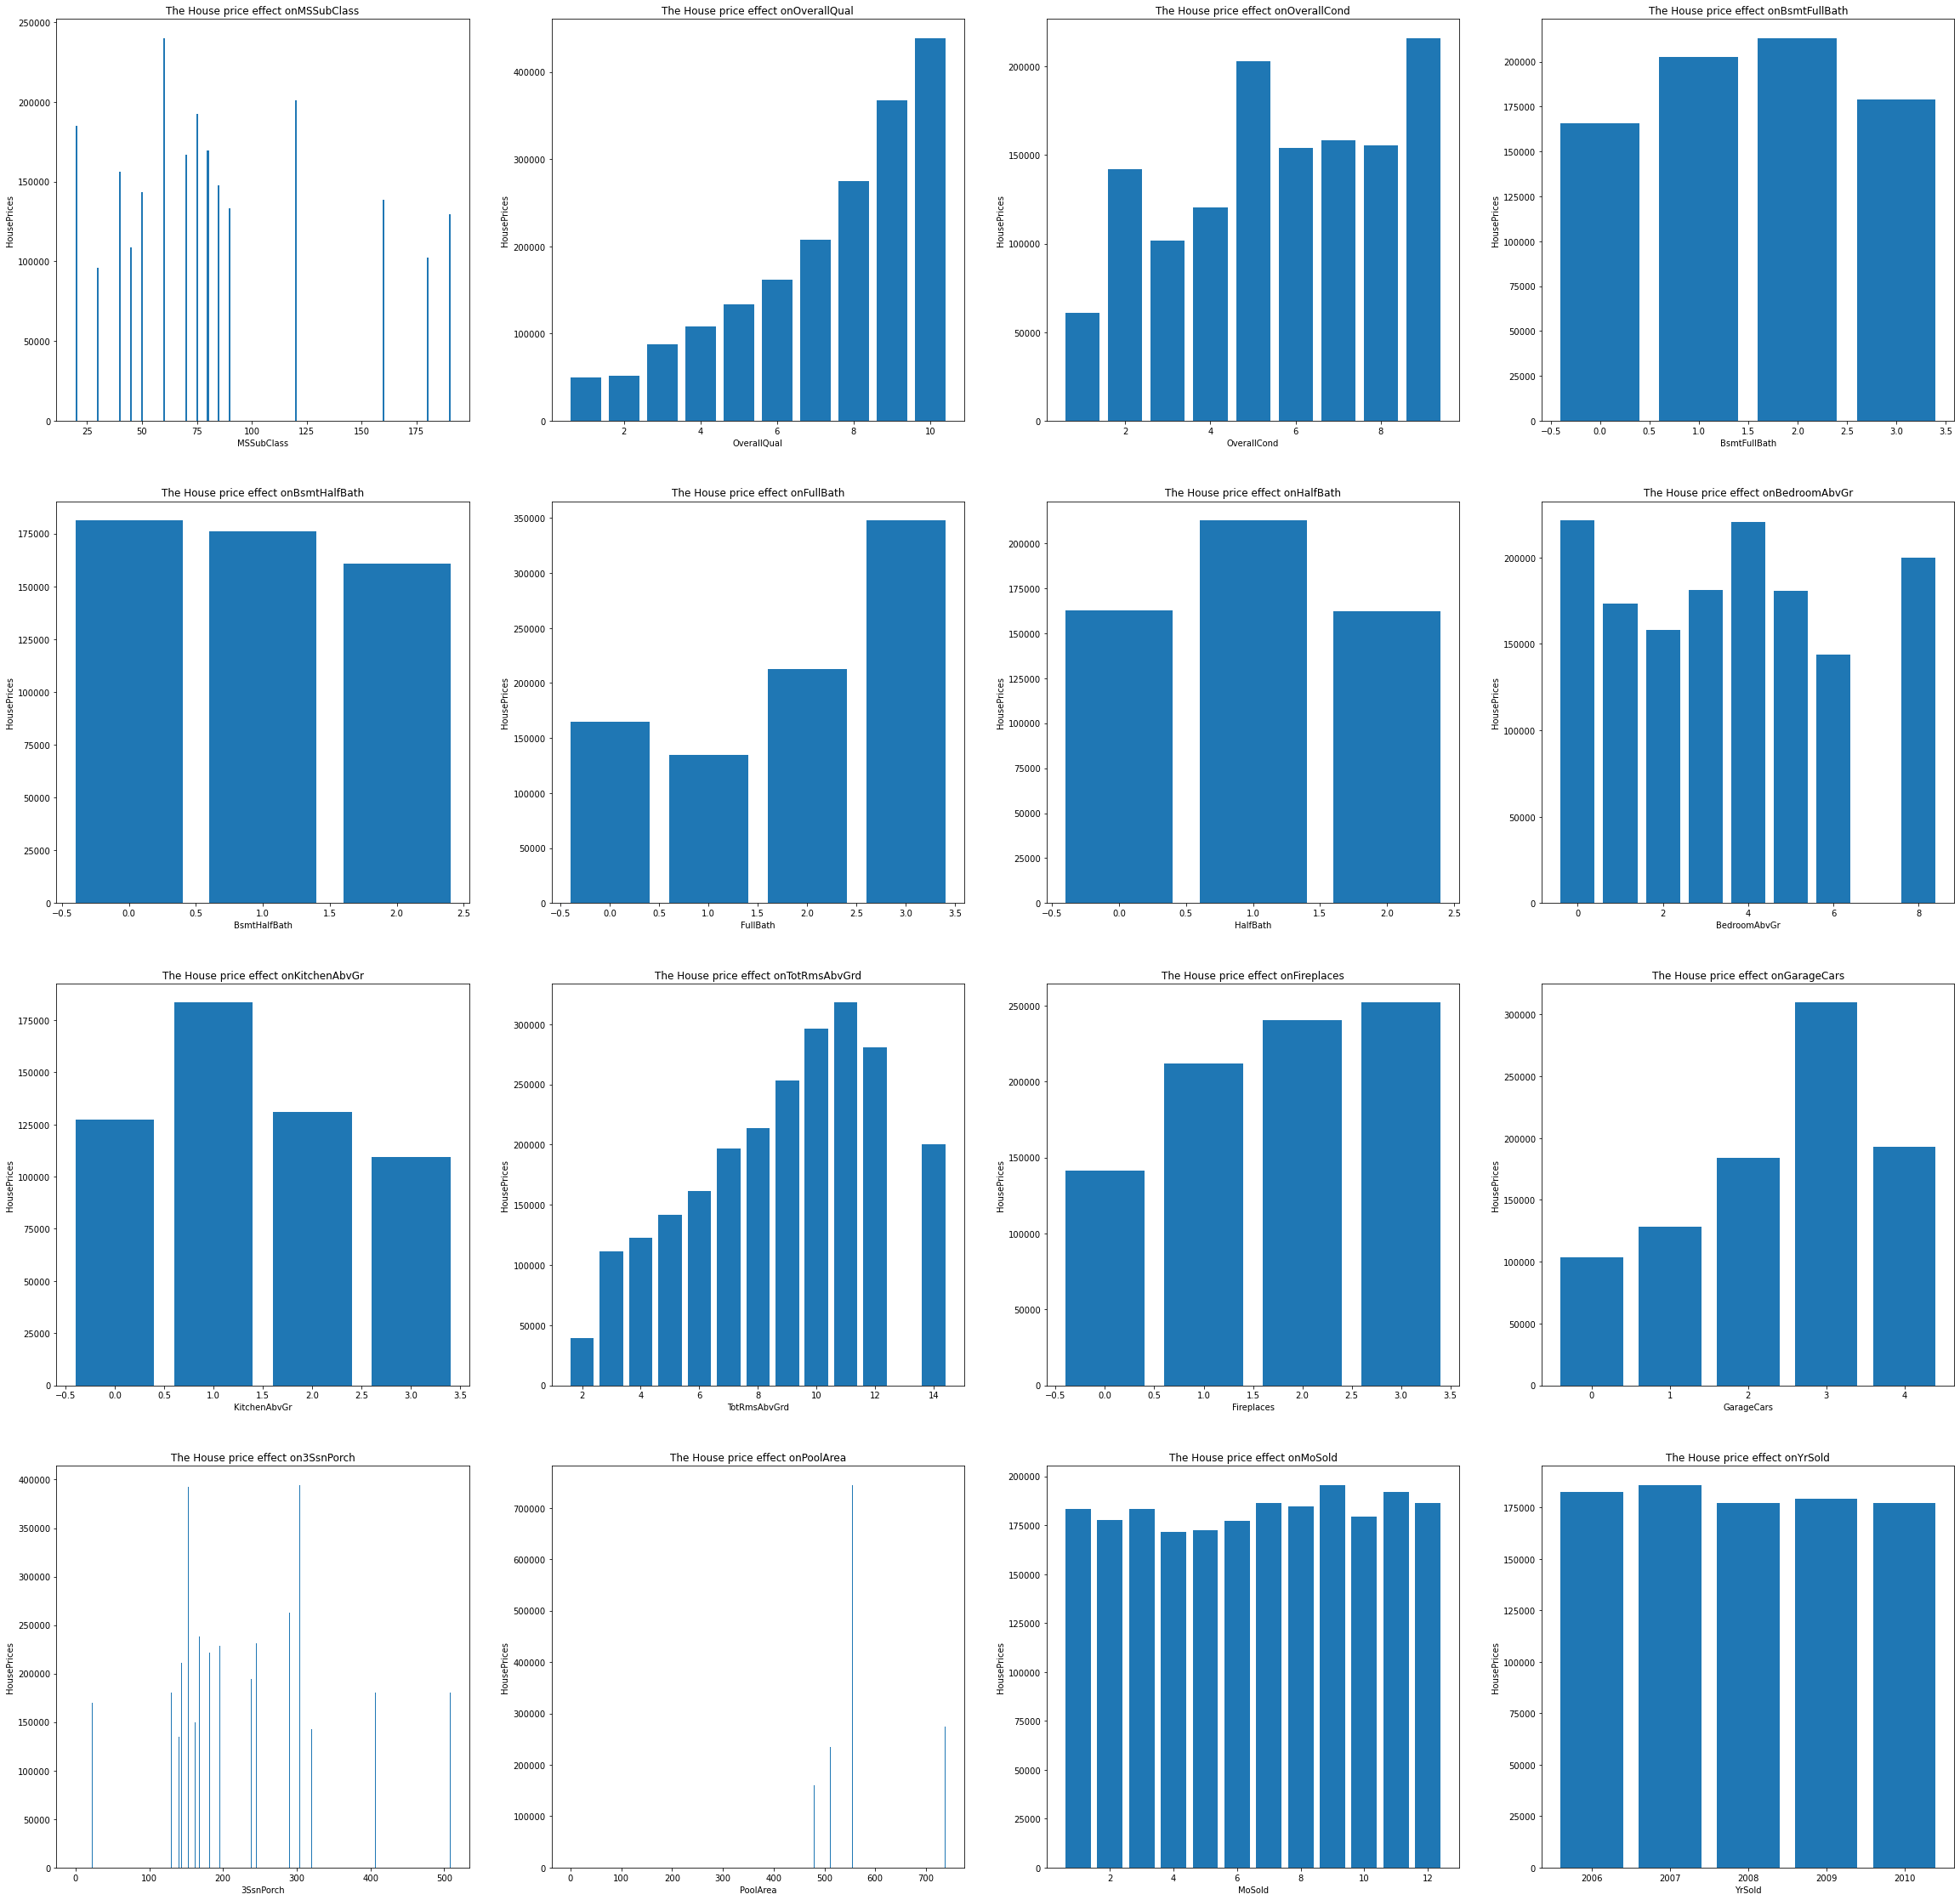

In [41]:
j=0
plt.figure(figsize=(40,40))
for column in descriatecols:
    plt.subplot(4,4,j+1)
    observationval=train.groupby(column)["SalePrice"].mean()
    observationvalDF=pd.DataFrame(observationval).sort_values(by='SalePrice',ascending=False)
    observationvalDF.reset_index(inplace=True)
    plt.bar(observationvalDF[column],observationvalDF['SalePrice'])
    plt.title(f"The House price effect on{column}")
    plt.xlabel(column)
    plt.ylabel('HousePrices')
    j+=1

In [42]:
# for object columns
objectcolumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [43]:
len(objectcolumns)

38

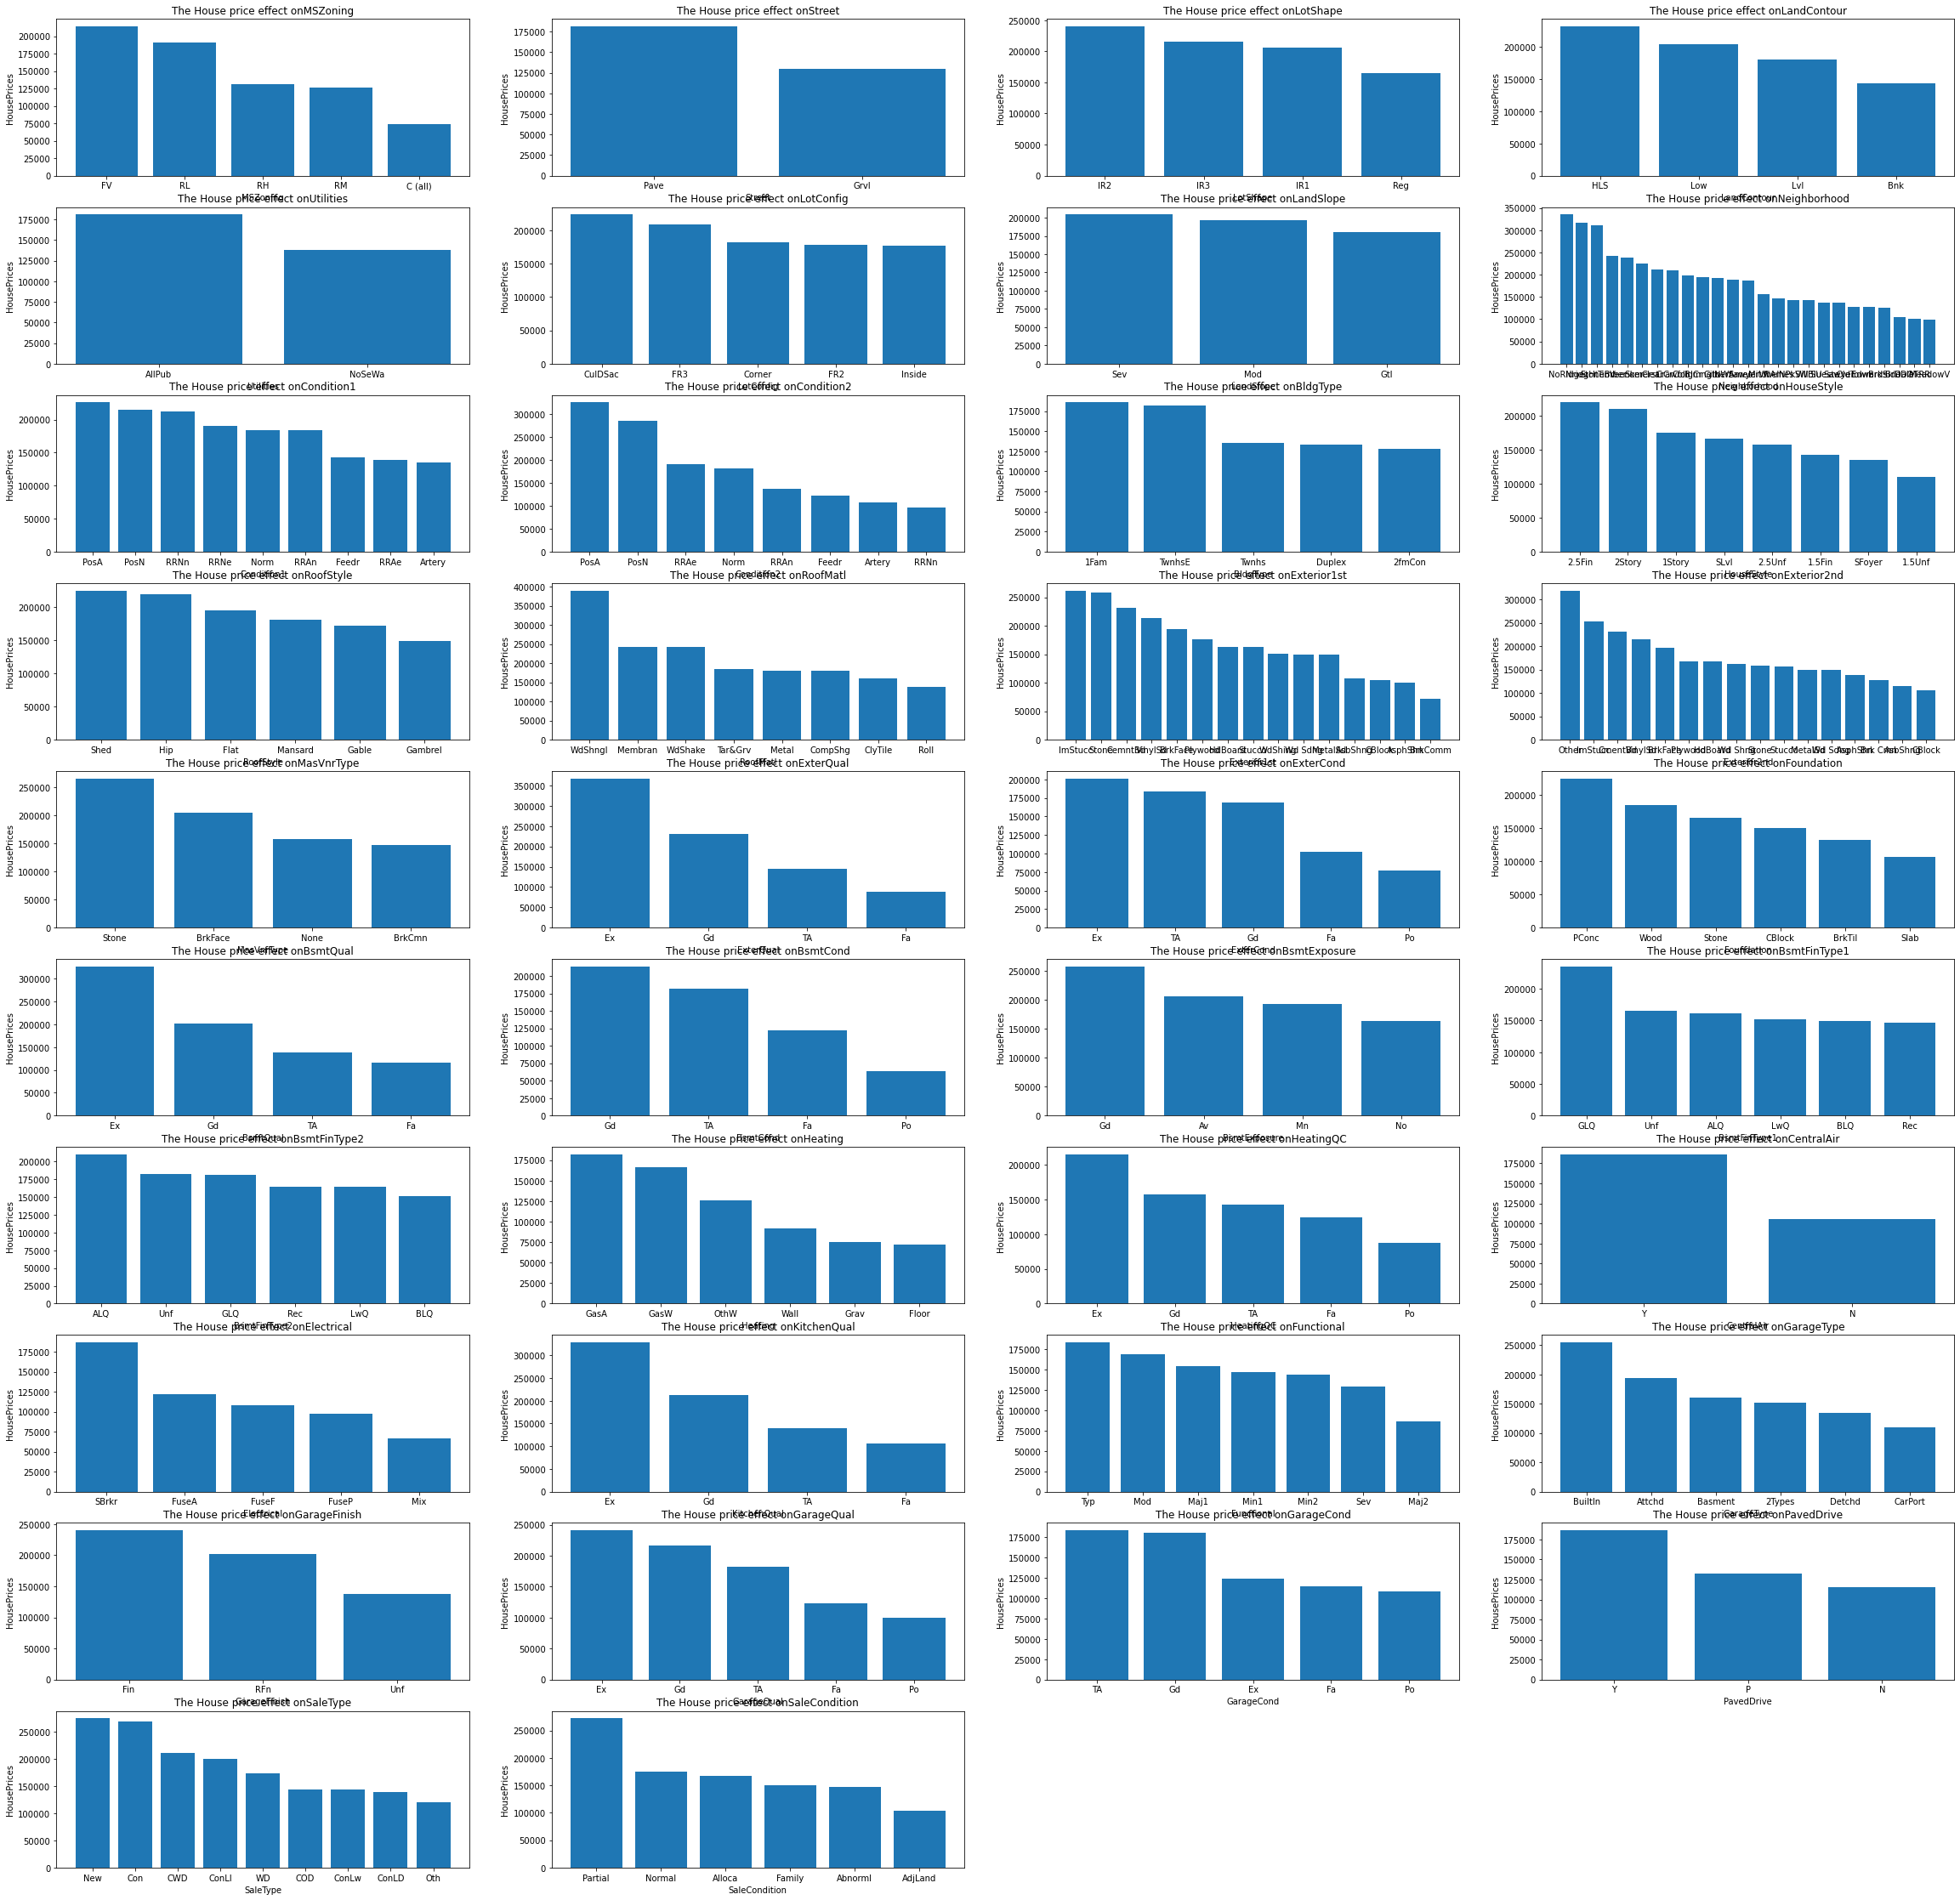

In [44]:
j=0
plt.figure(figsize=(40,40))
for column in objectcolumns:
    plt.subplot(10,4,j+1)
    observationval=train.groupby(column)["SalePrice"].mean()
    observationvalDF=pd.DataFrame(observationval).sort_values(by='SalePrice',ascending=False)
    observationvalDF.reset_index(inplace=True)
    plt.bar(observationvalDF[column],observationvalDF['SalePrice'])
    plt.title(f"The House price effect on{column}")
    plt.xlabel(column)
    plt.ylabel('HousePrices')
    j+=1

# step3 - Handling Outliers

In [45]:
continuouscols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [46]:
train.shape

(1460, 75)

In [47]:
train['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [48]:
upper_lim=train['LotFrontage'].mean()+train['LotFrontage'].std()*3
lower_lim=train['LotFrontage'].mean()-train['LotFrontage'].std()*3

In [49]:
upper_lim

135.9467298969942

In [50]:
lower_lim

3.780667363279747

In [51]:
train[(train['LotFrontage']<= upper_lim) & (train['LotFrontage'] >= lower_lim)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [52]:
1460-1444

16

In [53]:
# observations > than 135
train.loc[(train['LotFrontage']> upper_lim),'LotFrontage']

171     141.0
197     174.0
231     174.0
277     140.0
313     150.0
446     137.0
807     144.0
909     149.0
934     313.0
1107    168.0
1127    182.0
1173    138.0
1182    160.0
1211    152.0
1298    313.0
1337    153.0
Name: LotFrontage, dtype: float64

In [54]:
train.loc[(train['LotFrontage']> upper_lim),'LotFrontage']=upper_lim

In [55]:
train.loc[(train['LotFrontage']> upper_lim),'LotFrontage']

Series([], Name: LotFrontage, dtype: float64)

In [56]:
train.loc[(train['LotFrontage']< lower_lim),'LotFrontage']=lower_lim

In [57]:
train[(train['LotFrontage']<= upper_lim) & (train['LotFrontage'] >= lower_lim)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [58]:
for column in continuouscols:
    upper_lim=train[column].mean()+train[column].std()*3
    lower_lim=train[column].mean()-train[column].std()*3
    train[(train[column]<= upper_lim) & (train[column] >= lower_lim)]
    train.loc[(train[column]> upper_lim),column]=upper_lim
    train.loc[(train[column]< lower_lim),column]=lower_lim

In [59]:
train[(train[column]<= upper_lim) & (train[column] >= lower_lim)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.0,0,0.000000,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,1531.858114,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112.000000,0,0.0,0,0.000000,4,2010,WD,Normal,142125.0


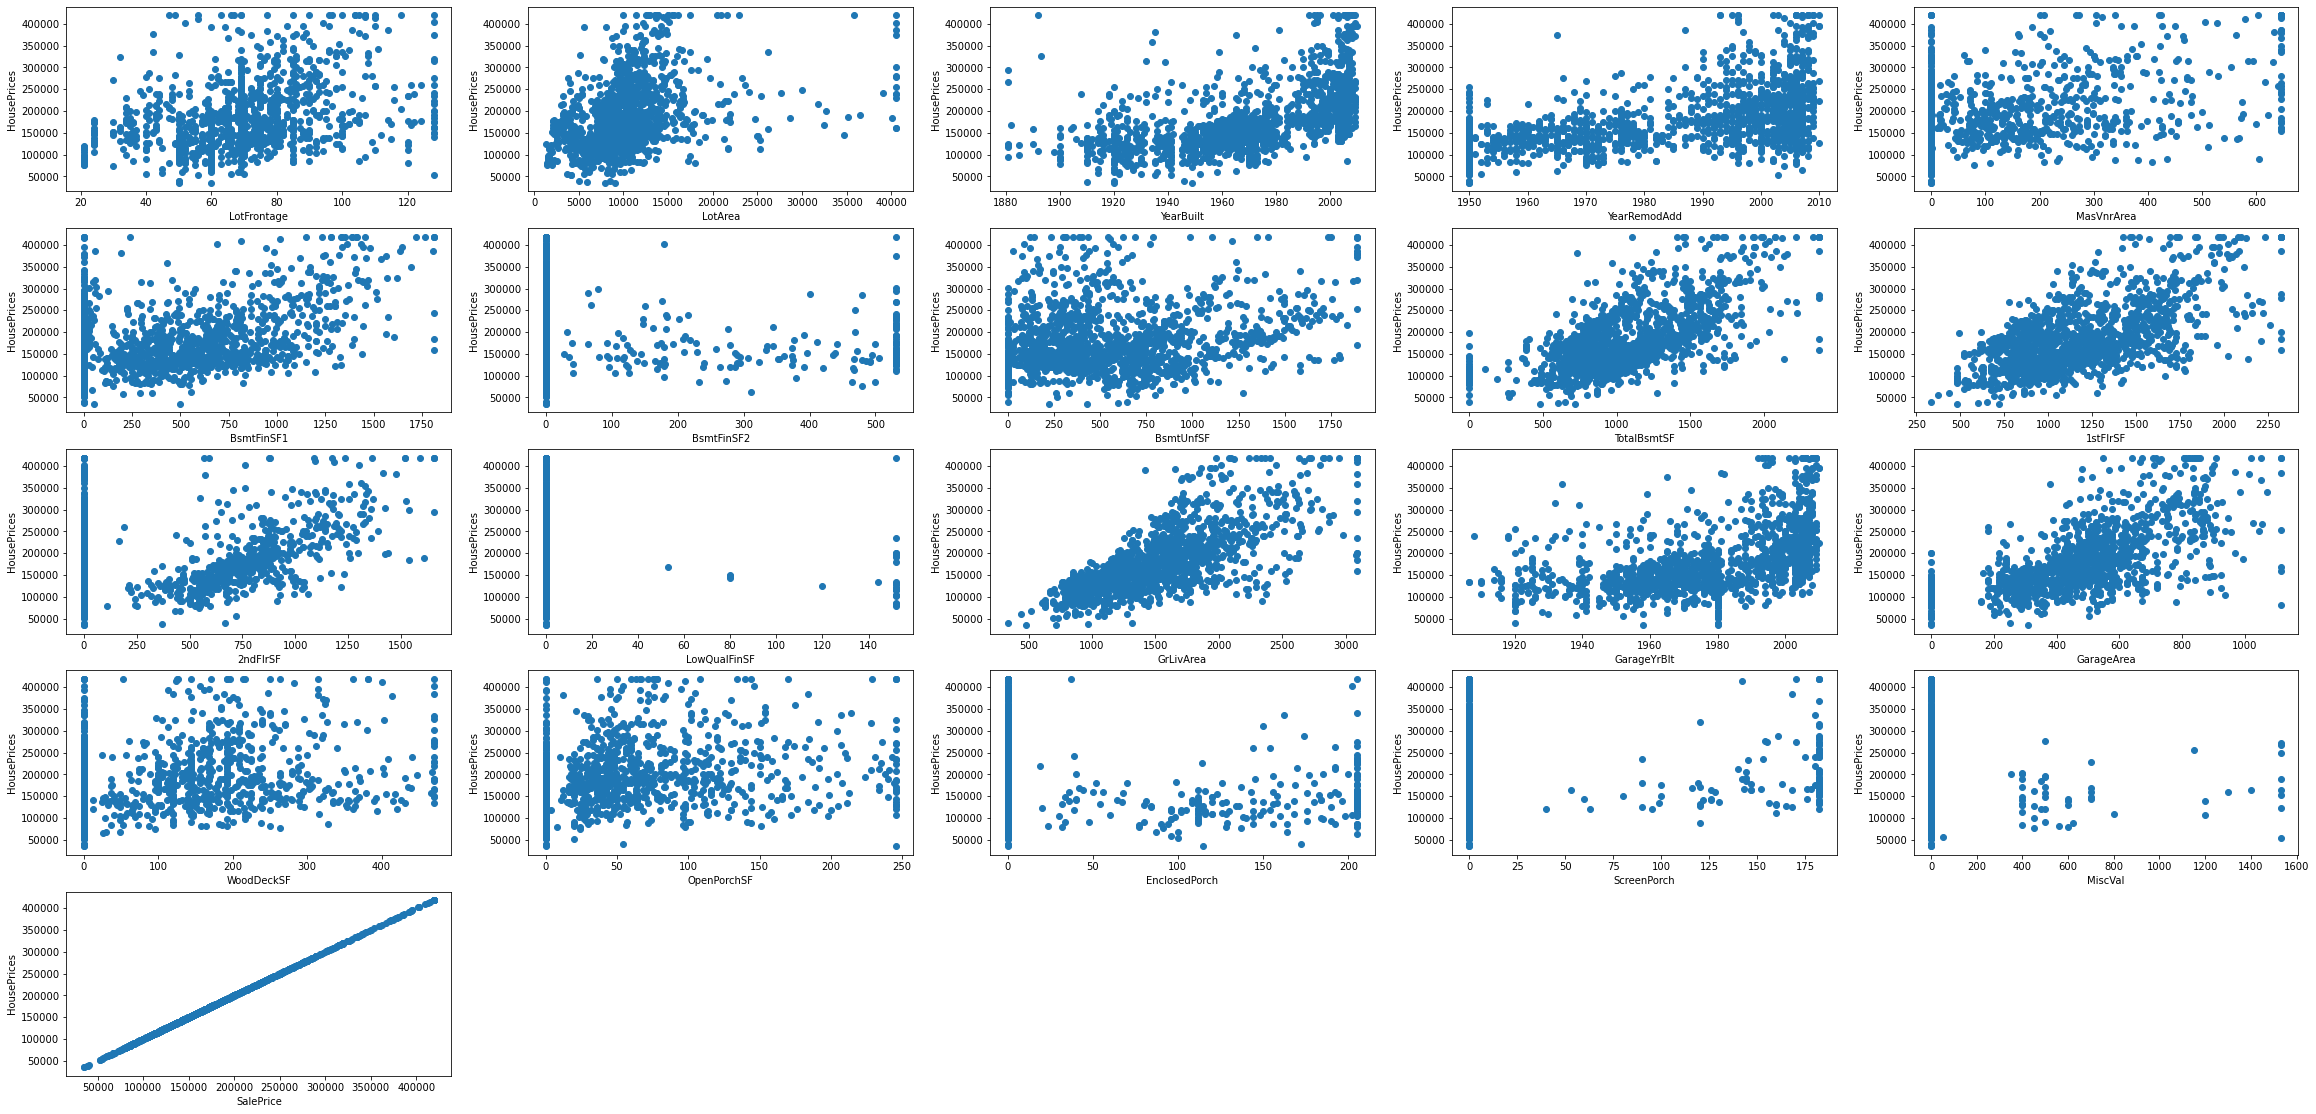

In [60]:
j=0
plt.figure(figsize=(40,40))
for column in continuouscols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train["SalePrice"])
    plt.xlabel(column)
    plt.ylabel('HousePrices')
    j+=1

# step 5- Categorical Encoding

In [61]:
objectcolumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [62]:
len(objectcolumns)

38

In [63]:
MSZoningLE=LabelEncoder()
MSZoningLE.fit_transform(train['MSZoning'])

array([3, 3, 3, ..., 3, 3, 3])

In [64]:
trainobjectDF=train[objectcolumns]
trainobjectDF

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [65]:
from collections import defaultdict
defaultEncoder=defaultdict(LabelEncoder)

# variable encoding
fittrainobjDF=trainobjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))


In [66]:
fittrainobjDF

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [67]:
defaultEncoder['LotShape'].transform(["Reg"])

array([3])

In [68]:
objectcolumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [69]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.0,0,0.0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.0,12,2008,WD,Normal,250000.0


In [70]:
train.drop(objectcolumns,axis=1,inplace=True)

In [71]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.000000,0,0.0,0,0.0,2,2008,208500.0
1,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.000000,0,0.0,0,0.0,5,2007,181500.0
2,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.000000,0,0.0,0,0.0,9,2008,223500.0
3,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,205.311555,0,0.0,0,0.0,2,2006,140000.0
4,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.000000,0,0.0,0,0.0,12,2008,250000.0


In [72]:
updatedTrain=pd.concat([train,fittrainobjDF],axis=1)
updatedTrain

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.000000,...,4,2,6,1,1,4,4,2,8,4
1,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.000000,...,4,3,6,1,1,4,4,2,8,4
2,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.000000,...,4,2,6,1,1,4,4,2,8,4
3,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.000000,...,4,2,6,5,2,4,4,2,8,0
4,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.000000,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917.0,6,5,1999.0,2000.0,0.0,0.0,0.000000,...,4,3,6,1,1,4,4,2,8,4
1456,20,85.0,13175.0,6,6,1978.0,1988.0,119.0,790.0,163.000000,...,4,3,2,1,2,4,4,2,8,4
1457,70,66.0,9042.0,7,9,1941.0,2006.0,0.0,275.0,0.000000,...,4,2,6,1,1,4,4,2,8,4
1458,20,68.0,9717.0,5,6,1950.0,1996.0,0.0,49.0,530.507133,...,0,2,6,1,2,4,4,2,8,4


# correlation

In [73]:
# how features(rows) are corelated for prediction(saleprice)

In [74]:
corrDF=updatedTrain.corr()
corrDF

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
MSSubClass,1.000000,-0.400658,-0.279702,0.032628,-0.059316,0.027944,0.040581,0.020520,-0.073235,-0.066358,...,0.051945,0.010129,0.003711,0.090719,0.012301,0.007630,0.002927,-0.059925,0.012464,-0.024940
LotFrontage,-0.400658,1.000000,0.455607,0.237468,-0.059285,0.126277,0.076991,0.187109,0.146296,0.044964,...,0.063530,-0.185197,0.030656,-0.236666,-0.222537,0.051435,0.043985,0.097751,-0.033825,0.066170
LotArea,-0.279702,0.455607,1.000000,0.181943,-0.015925,0.037913,0.038069,0.153834,0.239187,0.082894,...,0.059112,-0.114712,-0.044227,-0.175576,-0.168933,0.019339,0.038518,0.014115,0.001833,0.045476
OverallQual,0.032628,0.237468,0.181943,1.000000,-0.091932,0.573183,0.550684,0.416804,0.230085,-0.085303,...,0.254127,-0.555348,0.161047,-0.297995,-0.538529,0.090562,0.144988,0.229393,-0.060472,0.193703
OverallCond,-0.059316,-0.059285,-0.015925,-0.091932,1.000000,-0.376205,0.073741,-0.131177,-0.044549,0.054472,...,0.062664,0.067984,0.094040,0.163126,0.191063,-0.094761,-0.032236,-0.062236,0.095267,0.017758
YearBuilt,0.027944,0.126277,0.037913,0.573183,-0.376205,1.000000,0.593659,0.328898,0.252930,-0.063908,...,0.338915,-0.359384,0.154651,-0.443934,-0.590385,0.304135,0.246913,0.427485,-0.052367,0.201311
YearRemodAdd,0.040581,0.076991,0.038069,0.550684,0.073741,0.593659,1.000000,0.182833,0.126435,-0.088854,...,0.344514,-0.452431,0.079903,-0.271764,-0.456786,0.130241,0.150579,0.168457,0.019647,0.221687
MasVnrArea,0.020520,0.187109,0.153834,0.416804,-0.131177,0.328898,0.182833,1.000000,0.250260,-0.076081,...,0.116759,-0.263543,0.092105,-0.178620,-0.278422,0.113714,0.071267,0.154841,-0.062240,0.085328
BsmtFinSF1,-0.073235,0.146296,0.239187,0.230085,-0.044549,0.252930,0.126435,0.250260,1.000000,-0.041027,...,0.157218,-0.178807,0.044579,-0.242146,-0.246545,0.127551,0.100624,0.197006,0.012959,0.027687
BsmtFinSF2,-0.066358,0.044964,0.082894,-0.085303,0.054472,-0.063908,-0.088854,-0.076081,-0.041027,1.000000,...,0.015672,0.079340,-0.108940,-0.016654,0.044394,0.045400,-0.008157,0.067335,-0.029363,-0.057059


In [75]:
corrDF["SalePrice"]

MSSubClass      -0.088248
LotFrontage      0.362129
LotArea          0.381589
OverallQual      0.810469
OverallCond     -0.079194
YearBuilt        0.550119
YearRemodAdd     0.534087
MasVnrArea       0.468188
BsmtFinSF1       0.398349
BsmtFinSF2      -0.039318
BsmtUnfSF        0.218271
TotalBsmtSF      0.649209
1stFlrSF         0.629285
2ndFlrSF         0.306770
LowQualFinSF    -0.052332
GrLivArea        0.722471
BsmtFullBath     0.239062
BsmtHalfBath    -0.026792
FullBath         0.569415
HalfBath         0.289295
BedroomAbvGr     0.169804
KitchenAbvGr    -0.143346
TotRmsAbvGrd     0.533566
Fireplaces       0.477834
GarageYrBlt      0.488076
GarageCars       0.663012
GarageArea       0.650517
WoodDeckSF       0.339119
OpenPorchSF      0.358735
EnclosedPorch   -0.152807
3SsnPorch        0.050598
ScreenPorch      0.100159
PoolArea         0.059439
MiscVal         -0.041144
MoSold           0.060833
YrSold          -0.029711
SalePrice        1.000000
MSZoning        -0.180951
Street      

In [76]:
corrColumns=abs(corrDF["SalePrice"]).sort_values(ascending=False)
corrColumns

SalePrice        1.000000
OverallQual      0.810469
GrLivArea        0.722471
GarageCars       0.663012
GarageArea       0.650517
TotalBsmtSF      0.649209
ExterQual        0.641007
1stFlrSF         0.629285
BsmtQual         0.624198
KitchenQual      0.590739
FullBath         0.569415
GarageFinish     0.558118
YearBuilt        0.550119
YearRemodAdd     0.534087
TotRmsAbvGrd     0.533566
GarageYrBlt      0.488076
Fireplaces       0.477834
MasVnrArea       0.468188
HeatingQC        0.417038
Foundation       0.400229
BsmtFinSF1       0.398349
LotArea          0.381589
LotFrontage      0.362129
OpenPorchSF      0.358735
WoodDeckSF       0.339119
GarageType       0.321506
2ndFlrSF         0.306770
BsmtExposure     0.298020
HalfBath         0.289295
CentralAir       0.267532
LotShape         0.261493
Electrical       0.249019
PavedDrive       0.245371
BsmtFullBath     0.239062
SaleCondition    0.231494
BsmtUnfSF        0.218271
RoofStyle        0.215822
Neighborhood     0.214781
HouseStyle  

In [77]:
corrColumns[corrColumns>0.4]

SalePrice       1.000000
OverallQual     0.810469
GrLivArea       0.722471
GarageCars      0.663012
GarageArea      0.650517
TotalBsmtSF     0.649209
ExterQual       0.641007
1stFlrSF        0.629285
BsmtQual        0.624198
KitchenQual     0.590739
FullBath        0.569415
GarageFinish    0.558118
YearBuilt       0.550119
YearRemodAdd    0.534087
TotRmsAbvGrd    0.533566
GarageYrBlt     0.488076
Fireplaces      0.477834
MasVnrArea      0.468188
HeatingQC       0.417038
Foundation      0.400229
Name: SalePrice, dtype: float64

In [78]:
len(corrColumns[corrColumns>0.4])

20

In [79]:
finalColumns=corrColumns[corrColumns>0.4].index
finalColumns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'ExterQual', '1stFlrSF', 'BsmtQual', 'KitchenQual',
       'FullBath', 'GarageFinish', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'HeatingQC', 'Foundation'],
      dtype='object')

In [80]:
finalDF=updatedTrain[finalColumns]
finalDF

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,208500.0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,181500.0,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,223500.0,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,140000.0,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,250000.0,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,6,1647.0,2,460.0,953.0,3,953.0,2,3,2,1,1999.0,2000.0,7,1999.0,1,0.0,0,2
1456,210000.0,6,2073.0,2,500.0,1542.0,3,2073.0,2,3,2,2,1978.0,1988.0,7,1978.0,2,119.0,4,1
1457,266500.0,7,2340.0,1,252.0,1152.0,0,1188.0,3,2,2,1,1941.0,2006.0,9,1941.0,2,0.0,0,4
1458,142125.0,5,1078.0,1,240.0,1078.0,3,1078.0,3,2,1,2,1950.0,1996.0,5,1950.0,0,0.0,2,1


# step6 - Normalization and Standardization

In [81]:
# here sale price keeping aside,saving in y and removing from x
y=finalDF["SalePrice"]

In [82]:
X=finalDF.drop(["SalePrice"],axis=1)

In [83]:
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2


In [84]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [85]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [86]:
X_train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
615,6,1054.0,2,480.0,936.0,3,1054.0,3,2,1,1,1963.0,1963.0,6,1963.0,0,156.0,0,2
613,5,1120.0,0,0.0,1120.0,3,1120.0,2,3,1,2,2007.0,2007.0,6,1980.0,0,0.0,0,2
1303,7,1616.0,3,834.0,1616.0,2,1616.0,2,2,2,1,2005.0,2005.0,7,2005.0,0,228.0,0,2
486,5,1073.0,2,515.0,1073.0,3,1073.0,3,3,1,1,1965.0,1965.0,6,1965.0,0,168.0,4,1
561,5,1389.0,2,418.0,1389.0,3,1389.0,2,3,1,1,1974.0,1975.0,6,1975.0,1,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,6,1314.0,2,440.0,1314.0,2,1314.0,2,2,2,1,2006.0,2006.0,6,2006.0,1,0.0,2,2
1130,4,1981.0,2,576.0,1122.0,3,1328.0,3,2,2,2,1928.0,1950.0,7,1981.0,2,0.0,4,0
1294,5,864.0,2,572.0,864.0,3,864.0,3,3,1,2,1955.0,1990.0,5,1957.0,0,0.0,4,1
860,7,1426.0,1,216.0,912.0,2,912.0,3,2,1,2,1918.0,1998.0,7,1925.0,1,0.0,2,0


In [87]:
y_train

615     137500.0
613     147000.0
1303    232000.0
486     156000.0
561     170000.0
          ...   
1095    176432.0
1130    135000.0
1294    115000.0
860     189950.0
1126    174000.0
Name: SalePrice, Length: 978, dtype: float64

In [88]:
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
892,6,1068.0,1,264.0,1059.0,3,1068.0,3,3,1,1,1963.0,2003.0,6,1963.0,0,0.0,4,1
1105,8,2622.0,2,712.0,1463.0,2,1500.0,0,2,2,1,1994.0,1995.0,9,1994.0,2,362.0,0,2
413,5,1028.0,2,360.0,1008.0,3,1028.0,3,3,1,2,1927.0,1950.0,5,1927.0,1,0.0,2,1
522,6,1664.0,2,420.0,1004.0,3,1004.0,3,3,2,2,1947.0,1950.0,7,1950.0,2,0.0,0,1
1036,9,1620.0,3,912.0,1620.0,2,1620.0,0,0,2,0,2007.0,2008.0,6,2008.0,1,70.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,5,1271.0,1,312.0,720.0,3,720.0,3,3,2,2,1948.0,1950.0,7,1948.0,1,0.0,4,1
390,5,1367.0,1,384.0,861.0,3,961.0,3,3,1,2,1900.0,1950.0,7,1978.0,0,0.0,0,0
1409,7,2093.0,2,542.0,791.0,3,1236.0,2,3,2,0,1986.0,1991.0,7,1986.0,1,123.0,2,1
847,5,864.0,1,338.0,864.0,3,864.0,3,3,1,2,1972.0,1972.0,5,1972.0,1,0.0,0,1


In [89]:
y_test

892     154500.0
1105    325000.0
413     115000.0
522     159000.0
1036    315500.0
          ...   
1010    135000.0
390     119000.0
1409    215000.0
847     133500.0
1284    169000.0
Name: SalePrice, Length: 482, dtype: float64

In [90]:
sc_X=StandardScaler()
X_train=pd.DataFrame(sc_X.fit_transform(X_train),columns=X_train.columns)
X_train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,-0.087337,-0.945990,0.293095,0.015703,-0.285760,0.664480,-0.299134,0.844633,-0.424511,-1.070687,-0.272407,-0.261140,-1.052964,-0.330575,-0.651270,-0.941218,0.318527,-0.878121,0.801084
1,-0.817384,-0.811555,-2.436875,-2.288776,0.165063,0.664480,-0.118015,-0.305856,0.811118,-1.070687,0.955306,1.171901,1.067550,-0.330575,0.050290,-0.941218,-0.641412,-0.878121,0.801084
2,0.642710,0.198741,1.658080,1.715256,1.380324,-0.782873,1.243123,-0.305856,-0.424511,0.766387,-0.272407,1.106763,0.971163,0.287594,1.081996,-0.941218,0.761576,-0.878121,0.801084
3,-0.817384,-0.907289,0.293095,0.183738,0.049907,0.664480,-0.246994,0.844633,0.811118,-1.070687,-0.272407,-0.196002,-0.956577,-0.330575,-0.568733,-0.941218,0.392368,1.433594,-0.547384
4,-0.817384,-0.263633,0.293095,-0.281959,0.824146,0.664480,0.620183,-0.305856,0.811118,-1.070687,-0.272407,0.097120,-0.474642,-0.330575,-0.156051,0.595529,-0.641412,0.277737,-0.547384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,-0.087337,-0.416399,0.293095,-0.176337,0.640387,-0.782873,0.414365,-0.305856,-0.424511,0.766387,-0.272407,1.139332,1.019356,-0.330575,1.123264,0.595529,-0.641412,0.277737,0.801084
974,-1.547432,0.942204,0.293095,0.476599,0.169963,0.664480,0.452785,0.844633,-0.424511,0.766387,0.955306,-1.401060,-1.679479,0.287594,0.091558,2.132275,-0.641412,1.433594,-1.895852
975,-0.817384,-1.332998,0.293095,0.457395,-0.462169,0.664480,-0.820538,0.844633,0.811118,-1.070687,0.955306,-0.521693,0.248261,-0.948744,-0.898879,-0.941218,-0.641412,1.433594,-0.547384
976,0.642710,-0.188268,-1.071890,-1.251760,-0.344563,-0.782873,-0.688815,0.844633,-0.424511,-1.070687,0.955306,-1.726751,0.633808,0.287594,-2.219462,0.595529,-0.641412,0.277737,-1.895852


In [91]:
sc_X.var_

array([1.87628126e+00, 2.41027349e+05, 5.36715721e-01, 4.33847497e+04,
       1.66580443e+05, 4.77366062e-01, 1.32788082e+05, 7.55500353e-01,
       6.54973842e-01, 2.96310236e-01, 6.63447585e-01, 9.42730672e+02,
       4.30549697e+02, 2.61688957e+00, 5.87176243e+02, 4.23443570e-01,
       2.64095837e+04, 2.99399885e+00, 5.49944380e-01])

In [92]:
sc_X.mean_

array([6.11963190e+00, 1.51842921e+03, 1.78527607e+00, 4.76729227e+02,
       1.05263069e+03, 2.54089980e+00, 1.16300484e+03, 2.26584867e+00,
       2.34355828e+00, 1.58282209e+00, 1.22188139e+00, 1.97101803e+03,
       1.98484867e+03, 6.53476483e+00, 1.97878139e+03, 6.12474438e-01,
       1.04236108e+02, 1.51942740e+00, 1.40593047e+00])

In [93]:
np.sqrt(sc_X.var_)

array([  1.36977416, 490.94536219,   0.73260885, 208.29006133,
       408.14267469,   0.69091683, 364.40099038,   0.86919523,
         0.80930454,   0.54434386,   0.81452292,  30.7039195 ,
        20.74969148,   1.6176803 ,  24.23171977,   0.65072542,
       162.51025722,   1.73031756,   0.74158235])

In [94]:
X_test=pd.DataFrame(sc_X.transform(X_test),columns=X_test.columns)
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,-0.087337,-0.917473,-1.071890,-1.021312,0.015606,0.664480,-0.260715,0.844633,0.811118,-1.070687,-0.272407,-0.261140,0.874776,-0.330575,-0.651270,-0.941218,-0.641412,1.433594,-0.547384
1,1.372758,2.247848,0.293095,1.129534,1.005456,-0.782873,0.924792,-2.606835,-0.424511,0.766387,-0.272407,0.748503,0.489228,1.523932,0.628045,2.132275,1.586139,-0.878121,0.801084
2,-0.817384,-0.998949,0.293095,-0.560417,-0.109351,0.664480,-0.370484,0.844633,0.811118,-1.070687,0.955306,-1.433629,-1.679479,-0.948744,-2.136926,0.595529,-0.641412,0.277737,-0.547384
3,-0.087337,0.296511,0.293095,-0.272357,-0.119151,0.664480,-0.436346,0.844633,0.811118,0.766387,0.955306,-0.782246,-1.679479,0.287594,-1.187757,2.132275,-0.641412,-0.878121,-0.547384
4,2.102805,0.206888,1.658080,2.089734,1.390125,-0.782873,1.254100,-2.606835,-2.895768,0.766387,-1.500119,1.171901,1.115743,-0.330575,1.205800,0.595529,-0.210670,-0.878121,0.801084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,-0.817384,-0.503985,-1.071890,-0.790865,-0.814986,0.664480,-1.215707,0.844633,0.811118,0.766387,0.955306,-0.749677,-1.679479,0.287594,-1.270293,0.595529,-0.641412,1.433594,-0.547384
478,-0.817384,-0.308444,-1.071890,-0.445193,-0.469519,0.664480,-0.554348,0.844633,0.811118,-1.070687,0.955306,-2.312996,-1.679479,0.287594,-0.032246,-0.941218,-0.641412,-0.878121,-1.895852
479,0.642710,1.170336,0.293095,0.313365,-0.641028,0.664480,0.200315,-0.305856,0.811118,0.766387,-1.500119,0.487950,0.296454,0.287594,0.297899,0.595529,0.115463,0.277737,-0.547384
480,-0.817384,-1.332998,-1.071890,-0.666039,-0.462169,0.664480,-0.820538,0.844633,0.811118,-1.070687,0.955306,0.031982,-0.619222,-0.948744,-0.279856,0.595529,-0.641412,-0.878121,-0.547384


In [95]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [96]:
y_pred=lr.predict(X_test)
y_pred[0:10]

array([134006.90692292, 318488.90445563, 117326.43435848, 163230.57624899,
       307880.68173271,  70113.47714417, 222924.78849955, 160307.20992672,
        68319.42574709, 114955.10637782])

In [97]:
y_test.head()

892     154500.0
1105    325000.0
413     115000.0
522     159000.0
1036    315500.0
Name: SalePrice, dtype: float64

In [98]:
mean_squared_error(y_test,y_pred)

685260454.2633591

In [99]:
lr.score(X_test, y_test)

0.8770537572628975

In [100]:
lr.score(X_train, y_train)

0.8371734316221418

In [101]:
sc_y=StandardScaler()
y_train=pd.DataFrame(sc_y.fit_transform(np.array(y_train).reshape(-1,1)))
y_test=pd.DataFrame(sc_y.transform(np.array(y_test).reshape(-1,1)))

In [102]:
y_train

,0
0,-0.588470
1,-0.457411
2,0.715223
3,-0.333249
4,-0.140110
...,...
973,-0.051376
974,-0.622959
975,-0.898873
976,0.135114


In [103]:
y_test

,0
0,-0.353943
1,1.998223
2,-0.898873
3,-0.291862
4,1.867164
...,...
477,-0.622959
478,-0.843690
479,0.480697
480,-0.643653


In [104]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train,y_train)

LinearRegression()

In [105]:
y_pred_scaled=lr_scaled.predict(X_test)
y_pred_scaled

array([[-6.36659489e-01],
       [ 1.90839808e+00],
       [-8.66778218e-01],
       [-2.33498629e-01],
       [ 1.76205026e+00],
       [-1.51811383e+00],
       [ 5.90024580e-01],
       [-2.73828502e-01],
       [-1.54286401e+00],
       [-8.99492338e-01],
       [-5.96238315e-01],
       [-1.09583588e+00],
       [-1.04868711e+00],
       [ 4.98170933e-01],
       [ 1.17596495e-01],
       [-7.78460691e-01],
       [ 4.63889930e-01],
       [-7.23469834e-01],
       [-8.93276675e-01],
       [ 4.32788568e-01],
       [ 1.02874936e-03],
       [ 4.40751602e-01],
       [ 5.10411941e-03],
       [-8.40940944e-01],
       [ 4.36061837e-01],
       [-6.53193148e-02],
       [ 2.93300650e-01],
       [-1.22074388e+00],
       [ 7.32215403e-02],
       [ 7.00304629e-01],
       [-6.42152870e-01],
       [ 9.59799642e-01],
       [ 6.94432823e-01],
       [-1.20800247e+00],
       [ 1.06928285e+00],
       [-5.03353876e-01],
       [-2.73158642e-01],
       [ 5.92563768e-01],
       [ 1.4

In [106]:
y_test

,0
0,-0.353943
1,1.998223
2,-0.898873
3,-0.291862
4,1.867164
...,...
477,-0.622959
478,-0.843690
479,0.480697
480,-0.643653


In [107]:
mean_squared_error(y_test,y_pred_scaled)

0.13041961237661537

In [108]:
lr_scaled.score(X_test,y_test)

0.8770537572628975

In [110]:
X_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,-0.087337,-0.945990,0.293095,0.015703,-0.285760,0.664480,-0.299134,0.844633,-0.424511,-1.070687,-0.272407,-0.261140,-1.052964,-0.330575,-0.651270,-0.941218,0.318527,-0.878121,0.801084
1,-0.817384,-0.811555,-2.436875,-2.288776,0.165063,0.664480,-0.118015,-0.305856,0.811118,-1.070687,0.955306,1.171901,1.067550,-0.330575,0.050290,-0.941218,-0.641412,-0.878121,0.801084
2,0.642710,0.198741,1.658080,1.715256,1.380324,-0.782873,1.243123,-0.305856,-0.424511,0.766387,-0.272407,1.106763,0.971163,0.287594,1.081996,-0.941218,0.761576,-0.878121,0.801084
3,-0.817384,-0.907289,0.293095,0.183738,0.049907,0.664480,-0.246994,0.844633,0.811118,-1.070687,-0.272407,-0.196002,-0.956577,-0.330575,-0.568733,-0.941218,0.392368,1.433594,-0.547384
4,-0.817384,-0.263633,0.293095,-0.281959,0.824146,0.664480,0.620183,-0.305856,0.811118,-1.070687,-0.272407,0.097120,-0.474642,-0.330575,-0.156051,0.595529,-0.641412,0.277737,-0.547384


In [111]:
X_train.shape

(978, 19)

In [113]:
r2_score=[]
adjusted_r2=[]
feature_names=[]

for i in range(1,20):
    feature_names.append(X_train.columns[:i].to_list())
    lr =LinearRegression()
    lr.fit(X_train.columns[:i],y_train)
    r2=l

TypeError: fit() missing 1 required positional argument: 'y'